<a href="https://colab.research.google.com/github/AraceliDev/my-gooogle-colab/blob/main/laberinto_con_algoritmo__Aestella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABERINTO -> Algoritmo A*


## Problema
Laberinto (10x10)
- Objetivo: ir de un punto inicial a un punto final
- Direcciones: abajo, arriba, derecha e izquierda
- Limitaciones: algunas celdas pueden estar bloqueadas

*texto en cursiva*## Algoritmo A*

*   *g(n)* -> coste real acumulado, distancia desde el nodo inicial hasta la posición actual.
*   *h(n)* ->  coste estimado desde el nodo actual hasta el nodo objetivo.
*   ***f(n) = g(n) + h(n)*** -> coste total estimado (recorrido avanzado y estimación de recorrido pendiente, priozando caminos más eficientes)
*    *h(n)* = *|x_final -x_n| + |y_final -y_n|* -> Distancia de Manhattan (suma posición horizontal y vertical)


## Importaciones

In [9]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

## Laberinto
0 = camino libre
1 = pared
2 = camino por donde pasa

In [8]:
laberinto = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 1, 0, 1, 0, 1, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0]
])
salida = (0,0)
destino = (9,9)

In [10]:
# imprimir laberinto
print('  ', end='')
for j in range(laberinto.shape[1]):
    print(f'{j} ', end='')
print()
for i, fila in enumerate(laberinto):
    print(f'{i} ', end='')
    print(' '.join(map(str, fila)))

  0 1 2 3 4 5 6 7 8 9 
0 0 0 0 0 0 0 0 0 0 0
1 0 1 1 1 1 0 1 1 1 0
2 0 1 0 0 1 0 1 0 0 0
3 0 1 0 1 1 0 1 0 1 1
4 0 1 0 0 0 0 0 0 0 0
5 0 1 1 1 1 1 1 1 1 0
6 0 0 0 0 0 0 0 0 1 0
7 0 1 1 1 1 1 1 0 1 0
8 0 0 0 0 0 0 1 0 1 0
9 0 1 1 1 1 0 0 0 0 0


## Declaración funciones: heuristica y celdas vecinas

In [11]:
# calcular distancia de Manhattan
def distanciaManhattan(a,b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])
# generación de "vecinos" desde una pos
def get_celda_vecina(pos):
    # direcciones posibles (derecha, abajo, izquierda, arriba)
    direcciones = [(0,1), (1,0), (0,-1), (-1,0)]
    for dx, dy in direcciones:
      # revisar cada una de las posiciones colindantes
      celda_vecina = (pos[0] + dx, pos[1] + dy)
      # print("celda vecina ", celda_vecina)
      # verificar que esta pos no salga del laberinto
      if 0 <= celda_vecina[0] < laberinto.shape[0] and 0 <= celda_vecina[1] < laberinto.shape[1]:
      # verificar si esta libre
       if laberinto[celda_vecina] == 0:
        # devuelve la posición válida
        # print("celda valida: ", celda_vecina)
        yield celda_vecina

## Primeras comprobaciones

In [12]:
# print(f"Valor en posición: {laberinto[3,5]}")
print("=== Probando distancia Manhattan ===")
punto_a = (1, 0)
punto_b = (9, 9)
distancia = distanciaManhattan(punto_a, punto_b)
print(f"Distancia de {punto_a} a {punto_b}: {distancia}")

print("\n=== Probando vecinos ===")
posicion_prueba = (4, 5)
vecinos = list(get_celda_vecina(posicion_prueba))
print(f"Vecinos válidos de {posicion_prueba}: {vecinos}")

=== Probando distancia Manhattan ===
Distancia de (1, 0) a (9, 9): 17

=== Probando vecinos ===
Vecinos válidos de (4, 5): [(4, 6), (4, 4), (3, 5)]


# Algoritmo A *

### Declarar funcion a_estrella
Variables:
*   nodos_por_visitar: Cola de prioridad, nodos pendientes ordenados por menor costo total
*   anterior: Diccionario, celda → celda_anterior (para reconstruir el camino)
*   coste_real: Diccionario, celda → pasos_reales_desde_salida
*   coste_total: pasos_reales + estimación_restante (para priorizar)

In [14]:
def a_estrella(salida, destino, laberinto):
    nodos_por_visitar = [] # nodos que voy a ir visitando para encontrar mejor camino
    #declarar la cola con info del coste de cada celda
    heapq.heappush(nodos_por_visitar, (0, salida))
    anterior = {} #diccionario que guarda para cada nodo su predecesor. Para guardar el camino desde inicio a fin
    coste_real = {salida: 0}  #diccionario que guarda costo real, pasos dados

    while nodos_por_visitar:
        _, celda_actual = heapq.heappop(nodos_por_visitar) # nodo con menor costo
        # print("Celda actual ---> ",celda_actual)
        #si celda_actual = a destino entra aqui
        if celda_actual == destino:
            camino = []
            #busca en biblioteca anterior la celda actual y actualiza valor de celda actual a la celda anterior a celda actual
            while celda_actual in anterior:
                camino.append(celda_actual)
                celda_actual = anterior[celda_actual]
            #cuando llega (0,0) al no estar en anterior
            camino.append(salida)
            camino.reverse()
            return camino
        #celda_actual genera vecinos validos para celda actual
        for celda_vecina in get_celda_vecina(celda_actual):
          #añade coste real a celda vecina desde celda actual
            tentativa_g = coste_real[celda_actual] + 1
            # print("  celda vecina valida: ", celda_vecina)
            #si celda vecina no se ha visitado antes o ya la visite pero el valor de visitarla es menor ahora desde celda actual
            if celda_vecina not in coste_real or tentativa_g < coste_real[celda_vecina]:
                #guardo el trayecto
                anterior[celda_vecina] = celda_actual
                #guardo el coste real de esta celda desde celda actual
                coste_real[celda_vecina] = tentativa_g
                #calculo coste total mediante distancia de manhattan
                coste_total  = tentativa_g + distanciaManhattan(celda_vecina, destino)
                # print("  COSTE TOTAL  ", coste_total, "celda vecina ", celda_vecina)
                #guardo valor de coste total y la celda vecina correspondiente
                heapq.heappush(nodos_por_visitar, (coste_total , celda_vecina))
                # print("  final iteracción del bucle for: nodos por visitar son ", nodos_por_visitar)

    return camino

### Función pintar laberinto y camino encontrado


In [17]:
def pintar_laberinto_con_camino(laberinto, camino, salida, destino):
    pintar_laberinto = laberinto.copy()
    for x, y in camino:
        if (x, y) != salida and (x, y) != destino:
            pintar_laberinto[x, y] = 2 # por donde pasa pinta 2
    plt.imshow(pintar_laberinto, cmap="gray_r")
    plt.xticks(range(laberinto.shape[1]))
    plt.yticks(range(laberinto.shape[0]))
    plt.grid(False)
    plt.title("Camino encontrado por A*")
    plt.show()

### Resultado

Camino encontrado: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]



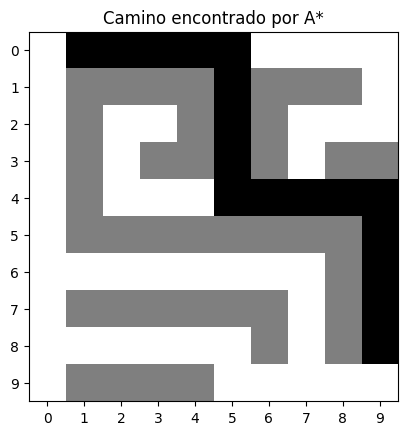

In [21]:
camino = a_estrella(salida, destino, laberinto)

if camino:
    print("Camino encontrado:", camino)
    print("")
    pintar_laberinto_con_camino(laberinto,camino,salida,destino)
else:
    print("No se ha encontrado ningún camino")